In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme()

In [10]:
def read_df(path):
    return pd.read_csv(path, sep="\t", compression="gzip", na_values="\\N")

ratings = read_df("title.ratings.tsv.gz")
basics = read_df("title.basics.tsv.gz")
df = pd.merge(ratings, basics, on="tconst")
df.head()

/tmp/ipykernel_766858/3407157218.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(path, sep="\t", compression="gzip", na_values="\\N")


,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,5.7,1869,short,Carmencita,Carmencita,0.0,1894.0,NaN,1.0,"Documentary,Short"
1,tt0000002,5.9,247,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5.0,"Animation,Short"
2,tt0000003,6.5,1645,short,Pauvre Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,4.0,"Animation,Comedy,Romance"
3,tt0000004,5.8,159,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12.0,"Animation,Short"
4,tt0000005,6.2,2471,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1.0,"Comedy,Short"


In [19]:
df["logNumVotes"] = np.log(df["numVotes"])

<AxesSubplot:xlabel='averageRating', ylabel='Count'>

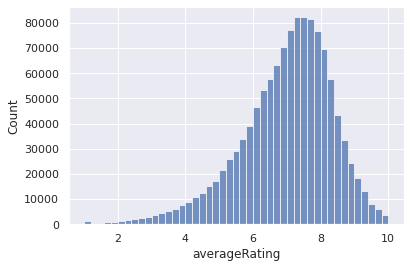

In [16]:
# How are the ratings distributed
sns.histplot(data=df, x="averageRating", binwidth=0.20)

<AxesSubplot:xlabel='startYear', ylabel='numVotes'>

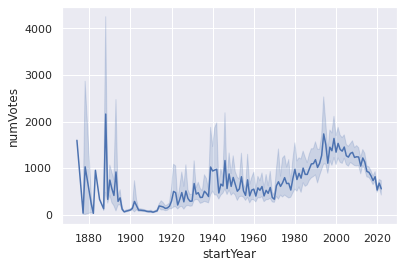

In [23]:
# Do newer movies receive more ratings ? 
sns.lineplot(data=df, x="startYear", y="numVotes")

<AxesSubplot:xlabel='genres', ylabel='numVotes'>

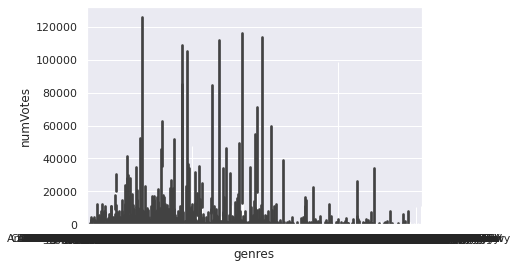

In [28]:
# What genres of movies receive more attention over time ?
# TODO: only keep n most relevant genres
sns.barplot(data=df.explode("genres"), x="genres", y="numVotes")

<AxesSubplot:xlabel='startYear', ylabel='averageRating'>

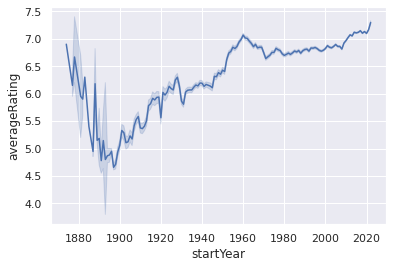

In [29]:
sns.lineplot(data=df, x="startYear", y="averageRating")
# Important question: the increase of the average rating is due to real
# improvement of the movies or are we biased to give a better rating to
# what is more recent 